In [1]:
import pandas as pd
from scipy.stats import pearsonr
import os
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from myhist import my_hist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from scipy.spatial.distance import cdist
import scipy.stats as stats

In [2]:

# # Read the file
# outfile = pd.read_excel('/Users/yiwengeng/Documents/PregnantPrj/Data/PLT_stats.xlsx',sheet_name='Summary')
# outfile.set_index(keys='SubjectID',append=True,inplace=True) # Set the index

# define all the variables
folder = '/Users/yiwengeng/Documents/PregnantPrj/Data/BIN_Data/'
# dirlist = ["PTL01","PTL02","PTL03","PTL05","PTL06","PTL07","PTL09","PTL10","PTL15"]
dirlist = ['BIN01','BIN02','BIN03','BIN04','BIN05','BIN06','BIN07','BIN08','BIN09','BIN10','BIN11','BIN12','BIN13','BIN14','BIN15','BIN16','BIN17','BIN18','BIN19','BIN20','BIN21','BIN23']
act_names=["activity_score", "score_meet_daily_targets","score_move_every_hour","score_stay_active","steps"]
hr_names=["bpm"]
spo2_names=["spo2"]
hrhrv_names=["5min_hr","5min_hrv"]
ready_names=["readiness_score", "score_previous_night","score_sleep_balance", 
             "score_previous_day","score_activity_balance","score_resting_hr",
             "score_hrv_balance","score_recovery_index","score_temperature"]
sleep_names=["sleep_score", "duration","efficiency","onset_latency","rmssd",
             "score_deep","score_efficiency","score_rem"]

df_act = {}
df_sleep = {}
df_ready = {}
df_hr = {}
df_hrhrv = {}
df_spo2 = {}

#### marker_L = [Workload, Control, Reward, Community, Fairness, Values]

In [ ]:
marker_L = ["Workload","Control","Reward","Community","Fairness","Values"]
for marker in marker_L:
    print("*"*20,marker,"*"*20,"\n")
    if marker == "Workload":
        marker_name = "Workload"
        healthy = [2,3,5,6,9,11,12,13,14,16,17,18,20,22,23]
        unhealthy = [1,4,7,8,10,15,19,21]
    elif marker == "Control":
        marker_name = "Control"
        healthy = [1,2,3,4,5,6,7,8,9,10,12,13,15,16,18,19,20,21,22,23]
        unhealthy = [11,14,17]
    elif marker == "Reward":
        marker_name = "Reward"
        healthy = [1,2,3,4,6,7,9,10,12,15,18,19,20,22,23]
        unhealthy = [5,8,11,13,14,16,17,21]
    elif marker == "Community":
        marker_name = "Community"
        healthy = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,20,21,22,23]
        unhealthy = [11,17]
    elif marker == "Fairness":
        marker_name = "Fairness"
        healthy = [1,2,3,4,5,6,8,9,10,12,14,15,16,18,19,20,21,22,23]
        unhealthy = [7,11,13,17] 
    elif marker == "Values":
        marker_name = "Values"
        healthy = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
        unhealthy = []

    for dir in dirlist:
        ID = int(dir[-2:])
        os.chdir(folder+dir)
        files = sorted(os.listdir())
        # print("ID",ID)
        # activity
        df_act[ID] = pd.read_csv(files[0], parse_dates = [0])
        df_act[ID].rename(columns={'score':'activity_score'},inplace=True)
        df_act[ID]['ID'] =  ID
        df_act[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('act',len(df_act[ID]))

        # sleep
        df_sleep[ID] = pd.read_csv(files[6], parse_dates = [0])
        df_sleep[ID].rename(columns={'score':'sleep_score'},inplace=True)
        df_sleep[ID]['ID'] =  ID
        df_sleep[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('sleep',len(df_sleep[ID]))
        # readiness
        df_ready[ID] = pd.read_csv(files[4], parse_dates = [0])
        df_ready[ID].rename(columns={'score':'readiness_score'},inplace=True)
        df_ready[ID]['ID'] =  ID
        df_ready[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('ready',len(df_ready[ID]))

        # daily_hr
        df_hr[ID] = pd.read_csv(files[1], parse_dates = [0])
        df_hr[ID]['ID'] =  ID
        df_hr[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None    
        # print('hr',len(df_hr[ID]))

        # hr_hrv
        df_hrhrv[ID] = pd.read_csv(files[3], parse_dates = [0])
        df_hrhrv[ID].rename(columns={'5-min hr':'5min_hr','5-min hrv':'5min_hrv'},inplace=True)
        df_hrhrv[ID]['ID'] =  ID
        df_hrhrv[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None   
        df_hrhrv[ID] = df_hrhrv[ID].loc[df_hrhrv[ID]['5min_hr'] != 0]
        df_hrhrv[ID]['timestamp'] = pd.to_datetime(df_hrhrv[ID]['timestamp'], utc=True)
        df_hrhrv[ID]['days_from_start'] = (df_hrhrv[ID]['timestamp'] - df_hrhrv[ID]['timestamp'].min()).dt.days
        df_hrhrv[ID]['Date'] = pd.to_datetime(df_hrhrv[ID]['timestamp'].dt.date, utc=True)

        # print("hrhrv",len(df_hrhrv[ID]))

        # spo2
        df_spo2[ID] = pd.read_csv(files[2], parse_dates = [0])
        df_spo2[ID].rename(columns={'average spo2':'spo2'},inplace=True)
        df_spo2[ID]['ID'] =  ID
        df_spo2[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None    
        # print('spo2',len(df_spo2[ID]))

        # print("*"*20)  
        
    # combine all dataframes
    df_act_all = pd.concat([df_act[int(dir[-2:])] for dir in dirlist], axis=0,ignore_index=True)
    # print("df_act_all: ",df_act_all[marker].value_counts())
    print("df_act_all: ",df_act_all[marker].value_counts())
    df_sleep_all = pd.concat([df_sleep[int(dir[-2:])] for dir in dirlist], axis=0,ignore_index=True)
    print("df_sleep_all: ",len(df_sleep_all))
    df_ready_all = pd.concat([df_ready[int(dir[-2:])] for dir in dirlist], axis=0,ignore_index=True)
    print("df_ready_all: ",len(df_ready_all))
    df_hr_all = pd.concat([df_hr[int(dir[-2:])] for dir in dirlist],ignore_index=True)
    print("df_hr_all: ",len(df_hr_all))
    df_hrhrv_all = pd.concat([df_hrhrv[int(dir[-2:])] for dir in dirlist],ignore_index=True)
    print("df_hrhrv_all: ",len(df_hrhrv_all))
    df_spo2_all = pd.concat([df_spo2[int(dir[-2:])] for dir in dirlist],ignore_index=True)
    print("df_spo2_all: ",len(df_spo2_all))

    my_hist(df_act_all,'activity_score','activity_score',left=0, right=0,marker=marker)
    my_hist(df_act_all,'steps','steps',left=71, right=71,marker=marker)
    my_hist(df_sleep_all,'sleep_score','sleep_score',left=0, right=0,marker=marker)
    my_hist(df_hrhrv_all,'5min_hrv','5min_hrv',left=0, right=0,marker=marker)

In [ ]:
marker_L = ["Workload","Control","Reward","Community","Fairness","Values"]
for marker in marker_L:
    print("*"*20,marker,"*"*20,"\n")
    if marker == "Workload":
        marker_name = "Workload"
        healthy = [2,3,5,6,9,11,12,13,14,16,17,18,20,22,23]
        unhealthy = [1,4,7,8,10,15,19,21]
    elif marker == "Control":
        marker_name = "Control"
        healthy = [1,2,3,4,5,6,7,8,9,10,12,13,15,16,18,19,20,21,22,23]
        unhealthy = [11,14,17]
    elif marker == "Reward":
        marker_name = "Reward"
        healthy = [1,2,3,4,6,7,9,10,12,15,18,19,20,22,23]
        unhealthy = [5,8,11,13,14,16,17,21]
    elif marker == "Community":
        marker_name = "Community"
        healthy = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,18,19,20,21,22,23]
        unhealthy = [11,17]
    elif marker == "Fairness":
        marker_name = "Fairness"
        healthy = [1,2,3,4,5,6,8,9,10,12,14,15,16,18,19,20,21,22,23]
        unhealthy = [7,11,13,17] 
    elif marker == "Values":
        marker_name = "Values"
        healthy = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
        unhealthy = []

    for dir in dirlist:
        ID = int(dir[-2:])
        os.chdir(folder+dir)
        files = sorted(os.listdir())
        # print("ID",ID)
        # activity
        df_act[ID] = pd.read_csv(files[0], parse_dates = [0])
        df_act[ID].rename(columns={'score':'activity_score'},inplace=True)
        df_act[ID]['ID'] =  ID
        df_act[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('act',len(df_act[ID]))

        # sleep
        df_sleep[ID] = pd.read_csv(files[6], parse_dates = [0])
        df_sleep[ID].rename(columns={'score':'sleep_score'},inplace=True)
        df_sleep[ID]['ID'] =  ID
        df_sleep[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('sleep',len(df_sleep[ID]))
        # readiness
        df_ready[ID] = pd.read_csv(files[4], parse_dates = [0])
        df_ready[ID].rename(columns={'score':'readiness_score'},inplace=True)
        df_ready[ID]['ID'] =  ID
        df_ready[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('ready',len(df_ready[ID]))

        # daily_hr
        df_hr[ID] = pd.read_csv(files[1], parse_dates = [0])
        df_hr[ID]['ID'] =  ID
        df_hr[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None    
        # print('hr',len(df_hr[ID]))

        # hr_hrv
        df_hrhrv[ID] = pd.read_csv(files[3], parse_dates = [0])
        df_hrhrv[ID].rename(columns={'5-min hr':'5min_hr','5-min hrv':'5min_hrv'},inplace=True)
        df_hrhrv[ID]['ID'] =  ID
        df_hrhrv[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None   
        df_hrhrv[ID] = df_hrhrv[ID].loc[df_hrhrv[ID]['5min_hr'] != 0]
        df_hrhrv[ID]['timestamp'] = pd.to_datetime(df_hrhrv[ID]['timestamp'], utc=True)
        df_hrhrv[ID]['days_from_start'] = (df_hrhrv[ID]['timestamp'] - df_hrhrv[ID]['timestamp'].min()).dt.days
        df_hrhrv[ID]['Date'] = pd.to_datetime(df_hrhrv[ID]['timestamp'].dt.date, utc=True)

        # print("hrhrv",len(df_hrhrv[ID]))

        # spo2
        df_spo2[ID] = pd.read_csv(files[2], parse_dates = [0])
        df_spo2[ID].rename(columns={'average spo2':'spo2'},inplace=True)
        df_spo2[ID]['ID'] =  ID
        df_spo2[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None    
        # print('spo2',len(df_spo2[ID]))

        # print("*"*20)  
        
    df_modify_HRV = {}
    for dir in dirlist:
        ID = int(dir[-2:])
        mean_hrv_per_day = df_hrhrv[ID].groupby('Date')['5min_hrv'].mean().reset_index()
        mean_hrv_per_day['Date'] = pd.to_datetime(mean_hrv_per_day['Date']).dt.date
        mean_hrv_per_day.rename(columns={'5min_hrv':'Avg_dailyHRV'},inplace=True)
            
        temp_act = pd.DataFrame(data ={'Date':pd.to_datetime(df_act[ID]['summary_date']).dt.date, 'ID': df_act[ID]['ID'],marker: df_act[ID][marker],'Act_Score':df_act[ID]['activity_score']})
        temp_sleep = pd.DataFrame(data ={'Date':pd.to_datetime(df_sleep[ID]['summary_date']).dt.date, 'Sleep_Score':df_sleep[ID]['sleep_score']})
        df_modify_HRV[ID] = pd.merge(left = temp_act, right = mean_hrv_per_day, on='Date', how='left')
        df_modify_HRV[ID] = pd.merge(left = df_modify_HRV[ID], right = temp_sleep, on='Date', how='left')
        df_modify_HRV[ID] = df_modify_HRV[ID].loc[df_modify_HRV[ID]['Sleep_Score'].notnull()]

    df_modify_HRV_all = pd.concat([df_modify_HRV[int(dir[-2:])] for dir in dirlist], axis=0,ignore_index=True)

    logistic_model = LogisticRegression().fit(df_modify_HRV_all[['Sleep_Score', 'Act_Score']], df_modify_HRV_all[marker])
    df_modify_HRV_all['Propensity_Score'] = logistic_model.predict_proba(df_modify_HRV_all[['Sleep_Score', 'Act_Score']])[:, 1]
    roc_auc = roc_auc_score(df_modify_HRV_all[marker], df_modify_HRV_all['Propensity_Score'])
    print("AUC: ",roc_auc)

    PTL_all = df_modify_HRV_all.groupby(marker)
    wo_trauma = PTL_all.get_group(0)
    w_trauma = PTL_all.get_group(1)
    distances = cdist(w_trauma['Propensity_Score'].values.reshape(-1, 1), wo_trauma['Propensity_Score'].values.reshape(-1, 1), 'euclidean')
    # For each treated individual, find the index of the control individual with the smallest distance
    matched_indices = np.argmin(distances, axis=1)

    # Extract matched control individuals
    matched_wo_trauma = wo_trauma.iloc[matched_indices]

    # Reset indices for concatenation
    w_trauma = w_trauma.reset_index(drop=True)
    matched_wo_trauma = matched_wo_trauma.reset_index(drop=True)

    # Combine the matched pairs into a single DataFrame
    matched_data = pd.concat([w_trauma, matched_wo_trauma], axis=1, keys=['w_trauma', 'wo_trauma'])

    avg_weight_loss_treated = matched_data['w_trauma']['Avg_dailyHRV'].mean()
    avg_weight_loss_control = matched_data['wo_trauma']['Avg_dailyHRV'].mean()

    # Estimate average treatment effect (ATE)
    ATE = avg_weight_loss_treated - avg_weight_loss_control


    # Removing NaN values
    group1 = matched_data['w_trauma']['Avg_dailyHRV']
    group2 = matched_data['wo_trauma']['Avg_dailyHRV']

    group1 = [x for x in group1 if not np.isnan(x)]
    group2 = [x for x in group2 if not np.isnan(x)]

    # Check if sample sizes and variances are sufficient for t-test
    if len(group1) > 1 and len(group2) > 1 and np.var(group1) > 0 and np.var(group2) > 0:
        t_stat, p_value = stats.ttest_ind(group1, group2)
        
    else:
        print("Cannot perform t-test due to insufficient sample size or variance.")
        t_stat, p_value = np.nan, np.nan

    print("t-statistic:", t_stat, "p-value:", p_value)
    t_stat, p_value
    print(marker,"\n","bad:",avg_weight_loss_treated, "\n","good:",avg_weight_loss_control,"\n","diff:", ATE)
    # t_statistic, p_value = stats.ttest_ind(matched_data['w_trauma']['Avg_dailyHRV'], matched_data['wo_trauma']['Avg_dailyHRV'] )


    # print(t_statistic, p_value)
    

******************** EE ******************** 

df_act_all:  741
df_sleep_all:  636
df_ready_all:  636
df_hr_all:  191132
df_hrhrv_all:  55577
df_spo2_all:  598
no_trama_count:  335
trama_count:  406
741
no_trama_count:  335 0 335 1.0
trama_count:  406 0 405 0.9975369458128078
no_trama_mean:  85.26865671641791
trama_mean:  76.0320987654321
no_trama_std:  13.093150937936976
trama_std:  18.54287129950011


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


no_trama_count:  335
trama_count:  406
741
no_trama_count:  335 12 323 1.0
trama_count:  406 3 403 1.0
no_trama_mean:  9182.146268656716
trama_mean:  7962.958128078818
no_trama_std:  4869.188734033959
trama_std:  4963.818788857305


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


no_trama_count:  290
trama_count:  346
636
no_trama_count:  290 0 290 1.0
trama_count:  346 0 346 1.0
no_trama_mean:  79.27931034482759
trama_mean:  76.89884393063583
no_trama_std:  10.576852682699093
trama_std:  11.901949607384953


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


no_trama_count:  25601
trama_count:  29976
55577
no_trama_count:  25601 0 25601 1.0
trama_count:  29976 0 29976 1.0
no_trama_mean:  36.02191320651537
trama_mean:  34.08780357619429
no_trama_std:  22.20485826863398
trama_std:  18.34928364291336


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


******************** DP ******************** 

df_act_all:  741
df_sleep_all:  636
df_ready_all:  636
df_hr_all:  191132
df_hrhrv_all:  55577
df_spo2_all:  598
no_trama_count:  578
trama_count:  163
741
no_trama_count:  578 0 577 0.9982698961937716
trama_count:  163 0 163 1.0
no_trama_mean:  83.08492201039861
trama_mean:  70.04907975460122
no_trama_std:  15.248795422683894
trama_std:  18.638471987714276


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


no_trama_count:  578
trama_count:  163
741
no_trama_count:  578 13 565 1.0
trama_count:  163 2 161 1.0
no_trama_mean:  9039.650519031142
trama_mean:  6650.687116564417
no_trama_std:  5056.819428290643
trama_std:  4075.135813114309


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


no_trama_count:  498
trama_count:  138
636
no_trama_count:  498 0 498 1.0
trama_count:  138 0 138 1.0
no_trama_mean:  76.89156626506023
trama_mean:  81.92753623188406
no_trama_std:  11.45054492287643
trama_std:  10.177718386248097


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


no_trama_count:  42694
trama_count:  12883
55577
no_trama_count:  42694 0 42694 1.0
trama_count:  12883 0 12883 1.0
no_trama_mean:  36.66536281444699
trama_mean:  29.389272684933633
no_trama_std:  20.00332347631037
trama_std:  20.013054266056674


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


******************** PA ******************** 

df_act_all:  741
df_sleep_all:  636
df_ready_all:  636
df_hr_all:  191132
df_hrhrv_all:  55577
df_spo2_all:  598
no_trama_count:  296
trama_count:  445
741
no_trama_count:  296 0 295 0.9966216216216216
trama_count:  445 0 445 1.0
no_trama_mean:  79.77627118644068
trama_mean:  80.50337078651685
no_trama_std:  15.143444945723784
trama_std:  18.027459344400405


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


no_trama_count:  296
trama_count:  445
741
no_trama_count:  296 3 293 1.0
trama_count:  445 12 433 1.0
no_trama_mean:  8552.307432432432
trama_mean:  8488.757303370787
no_trama_std:  4175.984811901584
trama_std:  5416.328072810678


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


no_trama_count:  274
trama_count:  362
636
no_trama_count:  274 0 274 1.0
trama_count:  362 0 362 1.0
no_trama_mean:  78.45985401459853
trama_mean:  77.62430939226519
no_trama_std:  10.608597383261776
trama_std:  11.916480600812935


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


no_trama_count:  24623
trama_count:  30954
55577
no_trama_count:  24623 0 24623 1.0
trama_count:  30954 0 30954 1.0
no_trama_mean:  37.073630345611825
trama_mean:  33.31230212573496
no_trama_std:  21.96148953299052
trama_std:  18.58998046287322


/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=18)
/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/myhist.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=18)


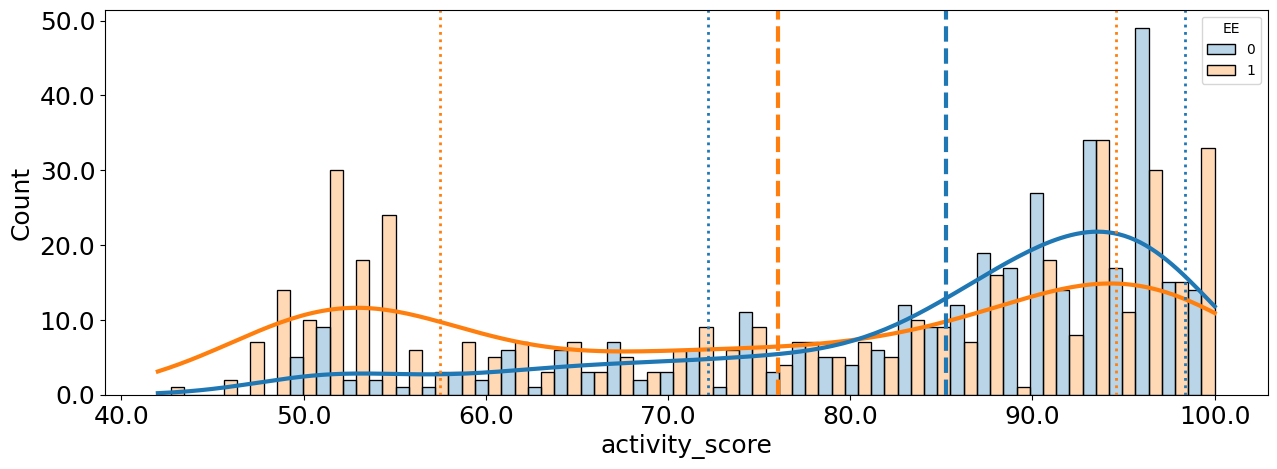

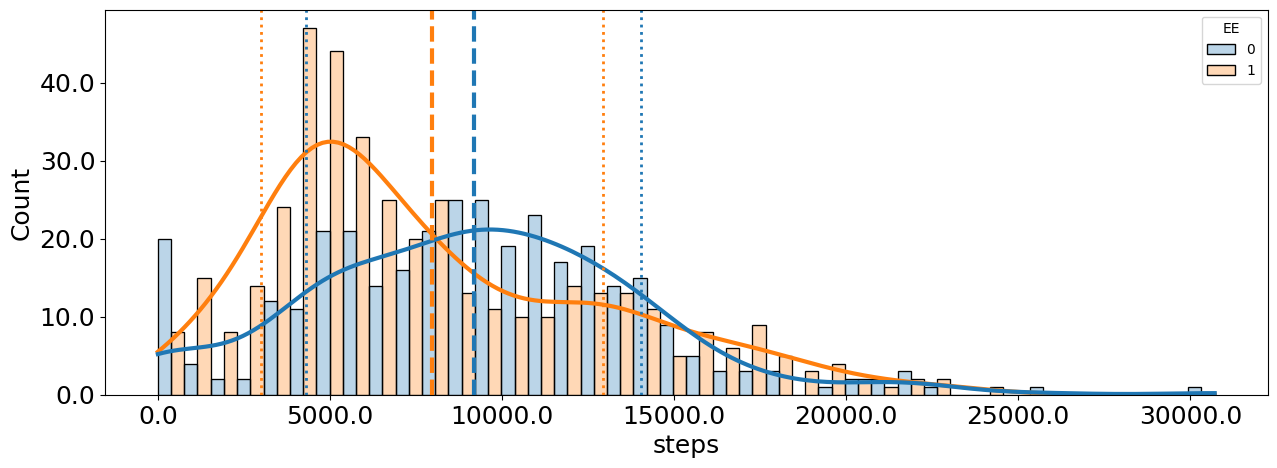

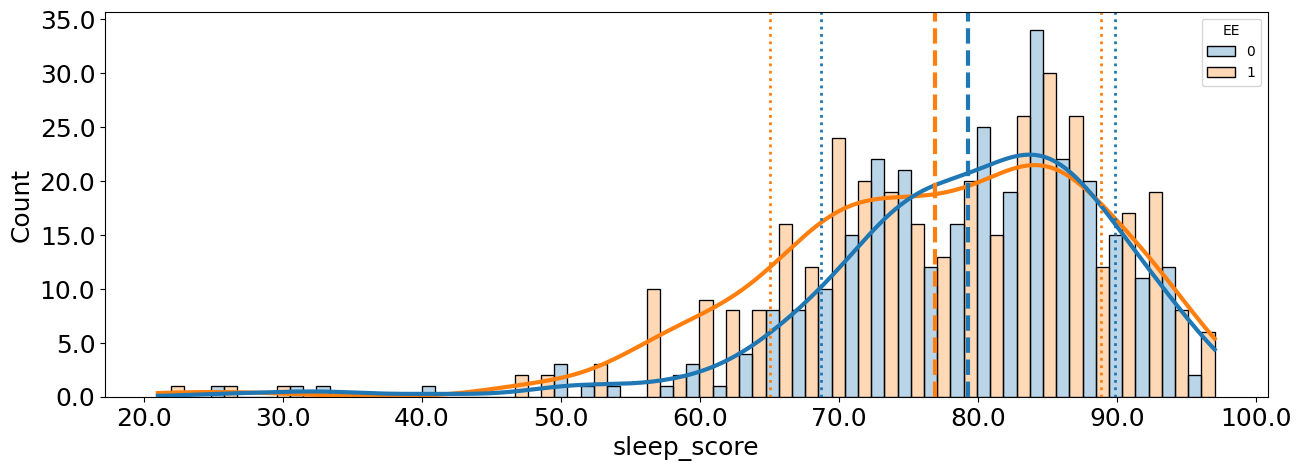

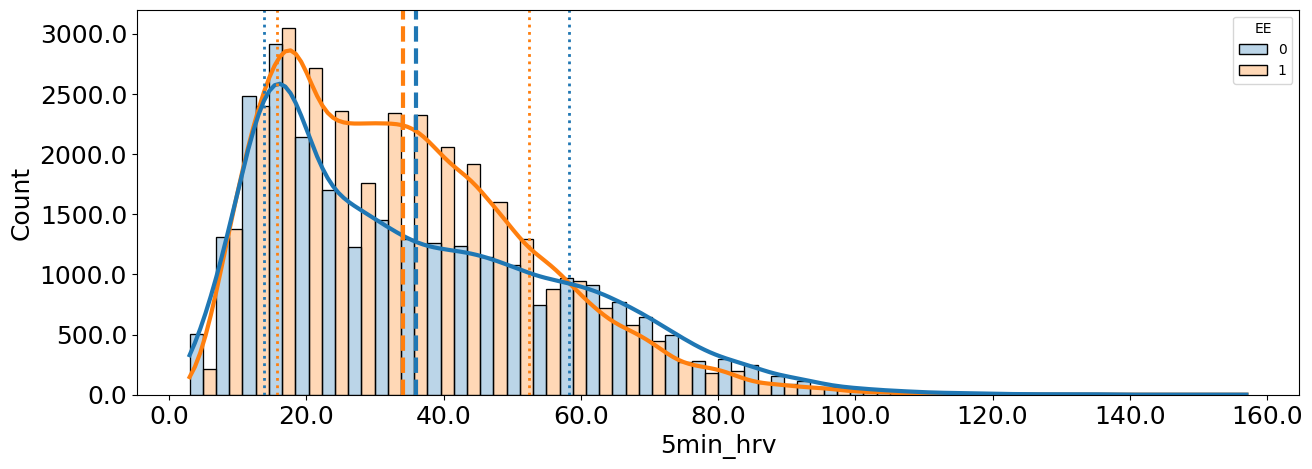

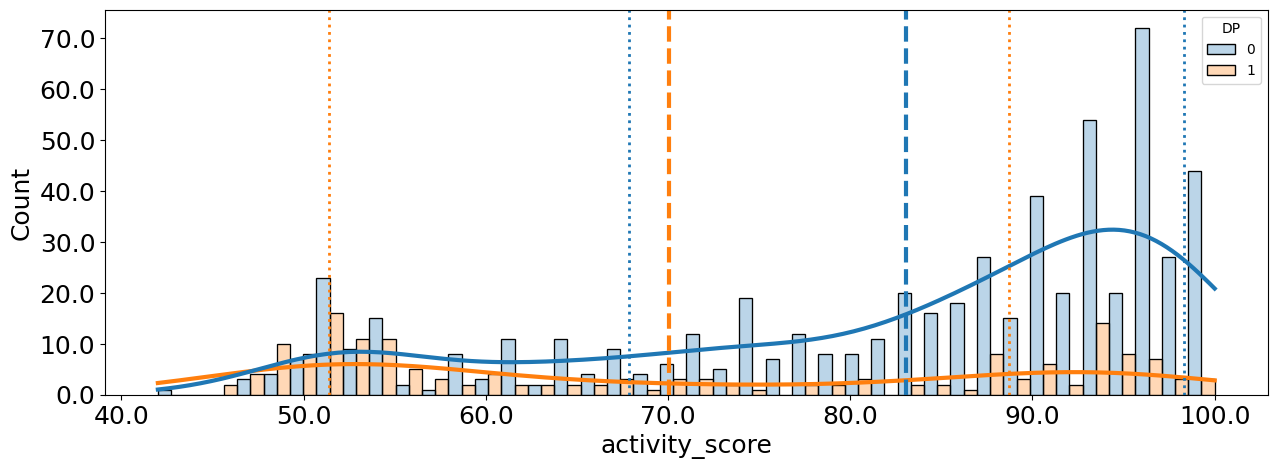

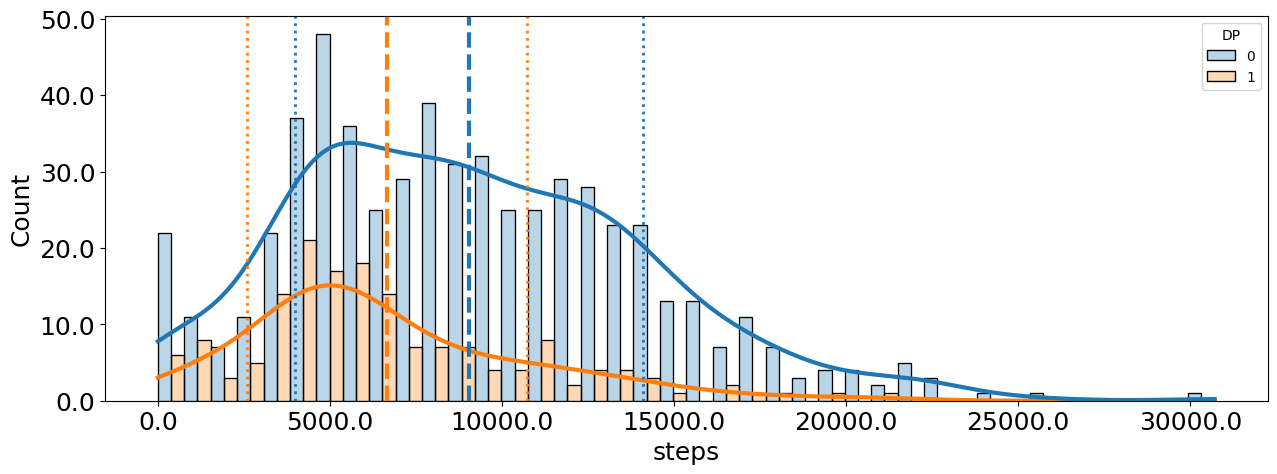

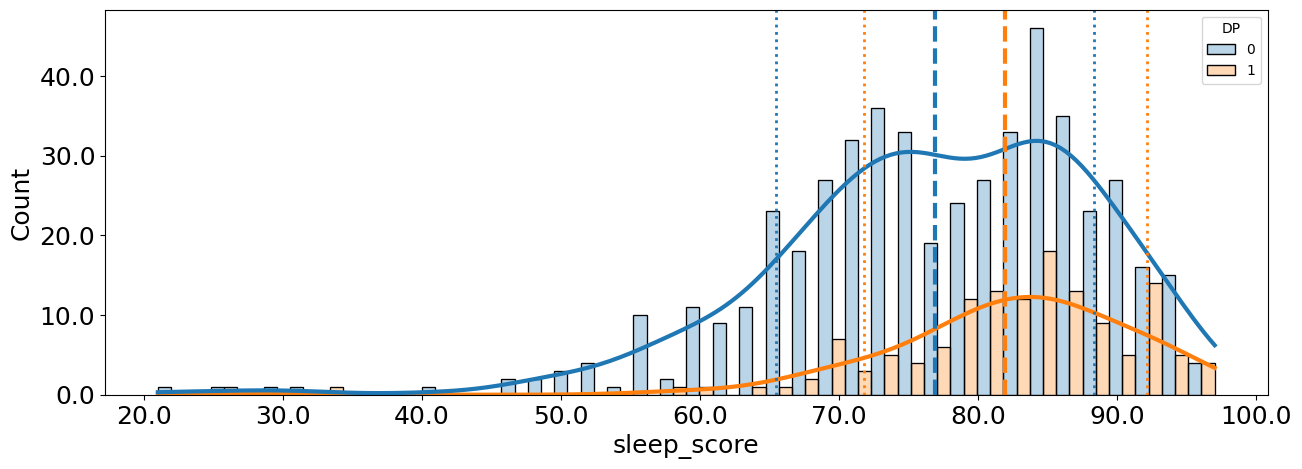

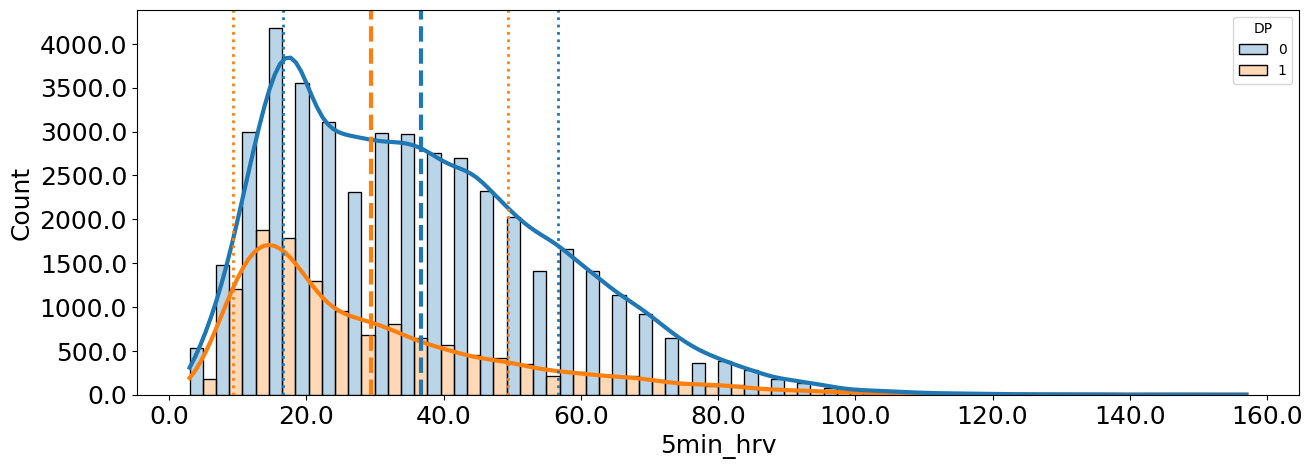

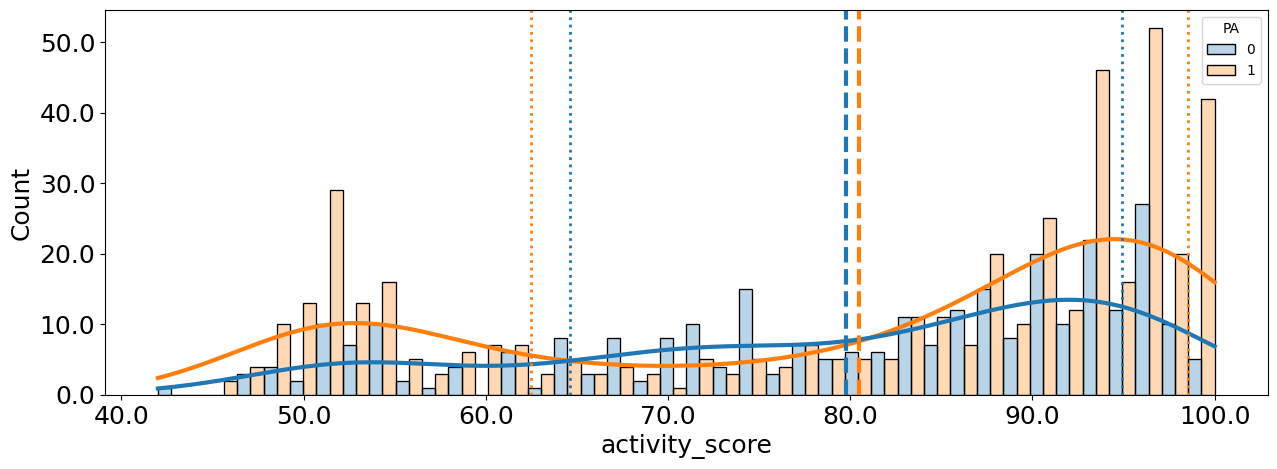

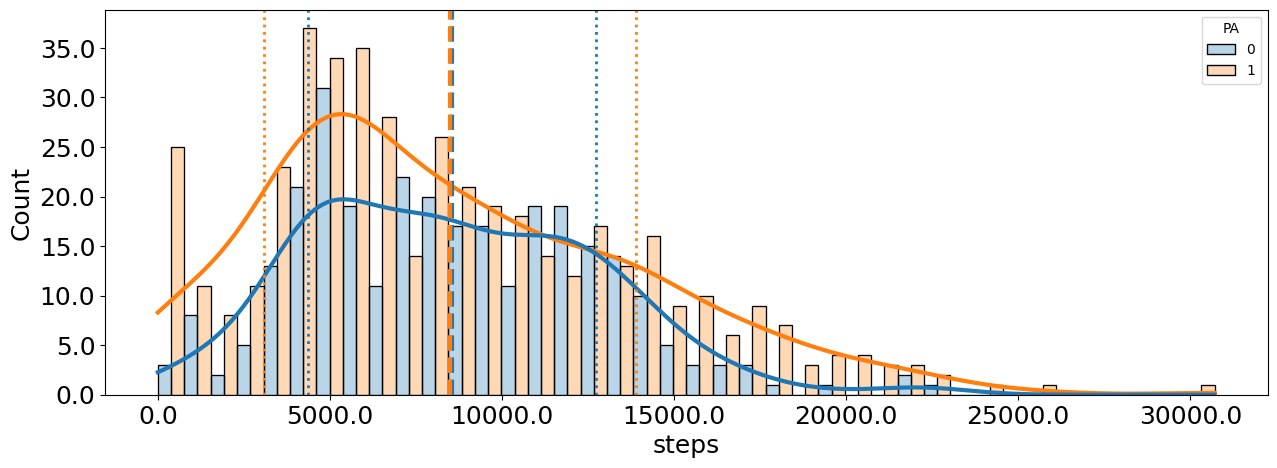

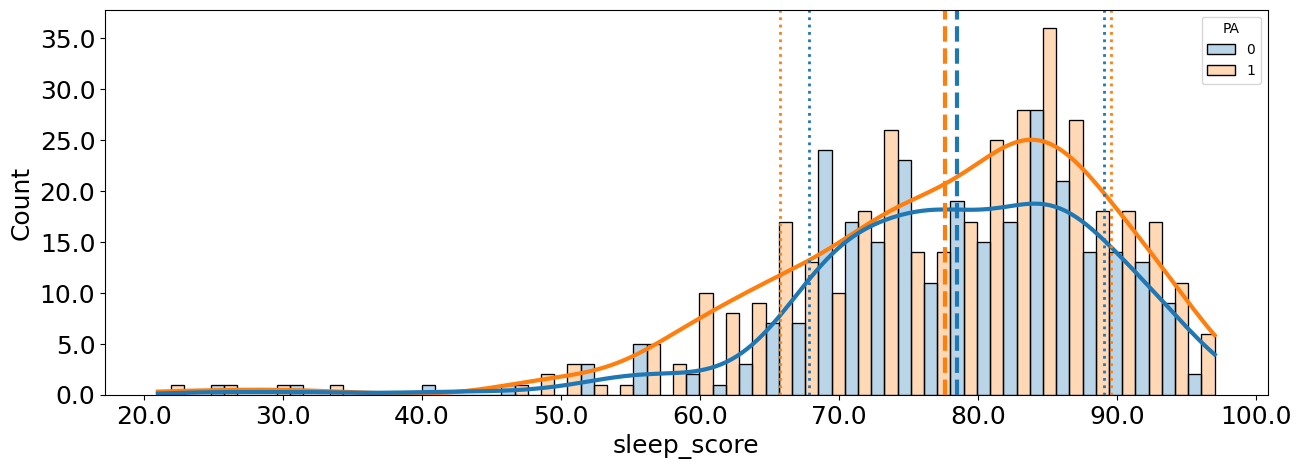

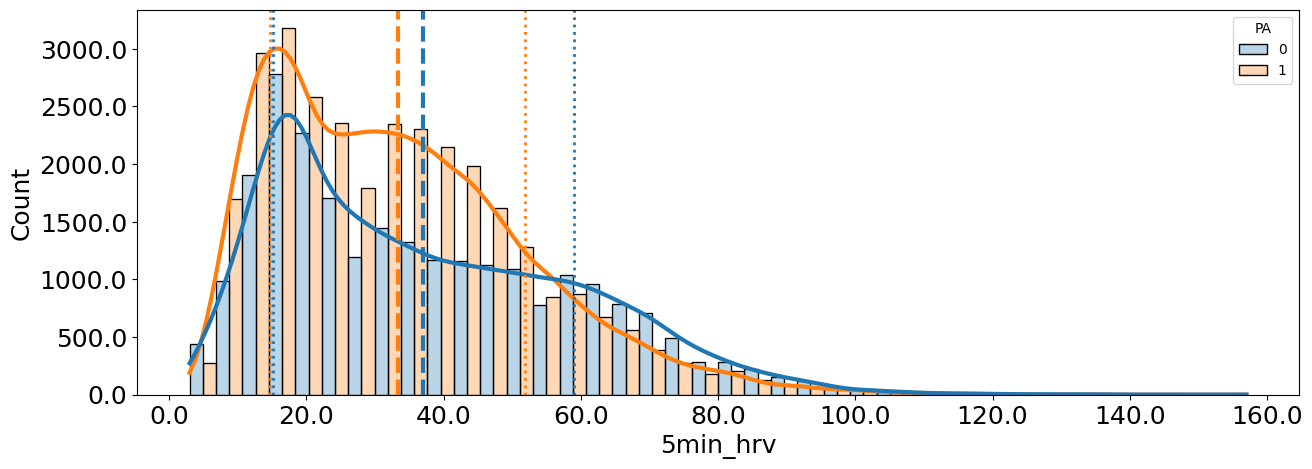

In [7]:
marker_L = ["EE","DP","PA"]
for marker in marker_L:
    print("*"*20,marker,"*"*20,"\n")
    if marker == "EE":
        marker_name = "EE"
        healthy = [2,3,6,9,12,13,14,16,18,20,22]
        unhealthy = [1,4,5,7,8,10,11,15,17,19,21,23]
    elif marker == "DP":
        marker_name = "DP"
        healthy = [2,3,5,6,7,8,9,12,14,15,16,17,18,19,20,21,22,23]
        unhealthy = [1,4,10,11,13]
    elif marker == "PA":
        marker_name = "PA"
        healthy = [3,6,7,10,12,16,17,18,21,22]
        unhealthy = [1,2,4,5,8,9,11,13,14,15,19,20,23]
    

    for dir in dirlist:
        ID = int(dir[-2:])
        os.chdir(folder+dir)
        files = sorted(os.listdir())
        # print("ID",ID)
        # activity
        df_act[ID] = pd.read_csv(files[0], parse_dates = [0])
        df_act[ID].rename(columns={'score':'activity_score'},inplace=True)
        df_act[ID]['ID'] =  ID
        df_act[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('act',len(df_act[ID]))

        # sleep
        df_sleep[ID] = pd.read_csv(files[6], parse_dates = [0])
        df_sleep[ID].rename(columns={'score':'sleep_score'},inplace=True)
        df_sleep[ID]['ID'] =  ID
        df_sleep[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('sleep',len(df_sleep[ID]))
        # readiness
        df_ready[ID] = pd.read_csv(files[4], parse_dates = [0])
        df_ready[ID].rename(columns={'score':'readiness_score'},inplace=True)
        df_ready[ID]['ID'] =  ID
        df_ready[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('ready',len(df_ready[ID]))

        # daily_hr
        df_hr[ID] = pd.read_csv(files[1], parse_dates = [0])
        df_hr[ID]['ID'] =  ID
        df_hr[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None    
        # print('hr',len(df_hr[ID]))

        # hr_hrv
        df_hrhrv[ID] = pd.read_csv(files[3], parse_dates = [0])
        df_hrhrv[ID].rename(columns={'5-min hr':'5min_hr','5-min hrv':'5min_hrv'},inplace=True)
        df_hrhrv[ID]['ID'] =  ID
        df_hrhrv[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None   
        df_hrhrv[ID] = df_hrhrv[ID].loc[df_hrhrv[ID]['5min_hr'] != 0]
        df_hrhrv[ID]['timestamp'] = pd.to_datetime(df_hrhrv[ID]['timestamp'], utc=True)
        df_hrhrv[ID]['days_from_start'] = (df_hrhrv[ID]['timestamp'] - df_hrhrv[ID]['timestamp'].min()).dt.days
        df_hrhrv[ID]['Date'] = pd.to_datetime(df_hrhrv[ID]['timestamp'].dt.date, utc=True)

        # print("hrhrv",len(df_hrhrv[ID]))

        # spo2
        df_spo2[ID] = pd.read_csv(files[2], parse_dates = [0])
        df_spo2[ID].rename(columns={'average spo2':'spo2'},inplace=True)
        df_spo2[ID]['ID'] =  ID
        df_spo2[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None    
        # print('spo2',len(df_spo2[ID]))

        # print("*"*20)  
        
    # combine all dataframes
    df_act_all = pd.concat([df_act[int(dir[-2:])] for dir in dirlist], axis=0,ignore_index=True)
    print("df_act_all: ",len(df_act_all))
    df_sleep_all = pd.concat([df_sleep[int(dir[-2:])] for dir in dirlist], axis=0,ignore_index=True)
    print("df_sleep_all: ",len(df_sleep_all))
    df_ready_all = pd.concat([df_ready[int(dir[-2:])] for dir in dirlist], axis=0,ignore_index=True)
    print("df_ready_all: ",len(df_ready_all))
    df_hr_all = pd.concat([df_hr[int(dir[-2:])] for dir in dirlist],ignore_index=True)
    print("df_hr_all: ",len(df_hr_all))
    df_hrhrv_all = pd.concat([df_hrhrv[int(dir[-2:])] for dir in dirlist],ignore_index=True)
    print("df_hrhrv_all: ",len(df_hrhrv_all))
    df_spo2_all = pd.concat([df_spo2[int(dir[-2:])] for dir in dirlist],ignore_index=True)
    print("df_spo2_all: ",len(df_spo2_all))

    my_hist(df_act_all,'activity_score','activity_score',left=0, right=0,marker=marker)
    my_hist(df_act_all,'steps','steps',left=71, right=71,marker=marker)
    my_hist(df_sleep_all,'sleep_score','sleep_score',left=0, right=0,marker=marker)
    # my_hist(df_sleep_all,'score_rem','score_rem',left=0, right=0,marker=marker)
    my_hist(df_hrhrv_all,'5min_hrv','5min_hrv',left=0, right=0,marker=marker)

In [6]:
marker_L = ["EE","DP","PA"]
for marker in ["DP"]:
    print("*"*20,marker,"*"*20,"\n")
    if marker == "EE":
        marker_name = "EE"
        healthy = [2,3,6,9,12,13,14,16,18,20,22]
        unhealthy = [1,4,5,7,8,10,11,15,17,19,21,23]
    elif marker == "DP":
        marker_name = "DP"
        healthy = [2,3,5,6,7,8,9,12,14,15,16,17,18,19,20,21,22,23]
        unhealthy = [1,4,10,11,13]
    elif marker == "PA":
        marker_name = "PA"
        healthy = [3,6,7,10,12,16,17,18,21,22]
        unhealthy = [1,2,4,5,8,9,11,13,14,15,19,20,23]
    

    for dir in dirlist:
        ID = int(dir[-2:])
        os.chdir(folder+dir)
        files = sorted(os.listdir())
        # print("ID",ID)
        # activity
        df_act[ID] = pd.read_csv(files[0], parse_dates = [0])
        df_act[ID].rename(columns={'score':'activity_score'},inplace=True)
        df_act[ID]['ID'] =  ID
        df_act[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('act',len(df_act[ID]))

        # sleep
        df_sleep[ID] = pd.read_csv(files[6], parse_dates = [0])
        df_sleep[ID].rename(columns={'score':'sleep_score'},inplace=True)
        df_sleep[ID]['ID'] =  ID
        df_sleep[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('sleep',len(df_sleep[ID]))
        # readiness
        df_ready[ID] = pd.read_csv(files[4], parse_dates = [0])
        df_ready[ID].rename(columns={'score':'readiness_score'},inplace=True)
        df_ready[ID]['ID'] =  ID
        df_ready[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None
        # print('ready',len(df_ready[ID]))

        # daily_hr
        df_hr[ID] = pd.read_csv(files[1], parse_dates = [0])
        df_hr[ID]['ID'] =  ID
        df_hr[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None    
        # print('hr',len(df_hr[ID]))

        # hr_hrv
        df_hrhrv[ID] = pd.read_csv(files[3], parse_dates = [0])
        df_hrhrv[ID].rename(columns={'5-min hr':'5min_hr','5-min hrv':'5min_hrv'},inplace=True)
        df_hrhrv[ID]['ID'] =  ID
        df_hrhrv[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None   
        df_hrhrv[ID] = df_hrhrv[ID].loc[df_hrhrv[ID]['5min_hr'] != 0]
        df_hrhrv[ID]['timestamp'] = pd.to_datetime(df_hrhrv[ID]['timestamp'], utc=True)
        df_hrhrv[ID]['days_from_start'] = (df_hrhrv[ID]['timestamp'] - df_hrhrv[ID]['timestamp'].min()).dt.days
        df_hrhrv[ID]['Date'] = pd.to_datetime(df_hrhrv[ID]['timestamp'].dt.date, utc=True)

        # print("hrhrv",len(df_hrhrv[ID]))

        # spo2
        df_spo2[ID] = pd.read_csv(files[2], parse_dates = [0])
        df_spo2[ID].rename(columns={'average spo2':'spo2'},inplace=True)
        df_spo2[ID]['ID'] =  ID
        df_spo2[ID][marker] = 0 if ID in healthy else 1 if ID in unhealthy else None    
        # print('spo2',len(df_spo2[ID]))

        # print("*"*20)   
        
    df_modify_HRV = {}
    for dir in dirlist:
        ID = int(dir[-2:])
        mean_hrv_per_day = df_hrhrv[ID].groupby('Date')['5min_hrv'].mean().reset_index()
        mean_hrv_per_day['Date'] = pd.to_datetime(mean_hrv_per_day['Date']).dt.date
        mean_hrv_per_day.rename(columns={'5min_hrv':'Avg_dailyHRV'},inplace=True)
            
        temp_act = pd.DataFrame(data ={'Date':pd.to_datetime(df_act[ID]['summary_date']).dt.date, 'ID': df_act[ID]['ID'],marker: df_act[ID][marker],'Act_Score':df_act[ID]['activity_score']})
        temp_sleep = pd.DataFrame(data ={'Date':pd.to_datetime(df_sleep[ID]['summary_date']).dt.date, 'Sleep_Score':df_sleep[ID]['sleep_score']})
        df_modify_HRV[ID] = pd.merge(left = temp_act, right = mean_hrv_per_day, on='Date', how='left')
        df_modify_HRV[ID] = pd.merge(left = df_modify_HRV[ID], right = temp_sleep, on='Date', how='left')
        df_modify_HRV[ID] = df_modify_HRV[ID].loc[df_modify_HRV[ID]['Sleep_Score'].notnull()]

    df_modify_HRV_all = pd.concat([df_modify_HRV[int(dir[-2:])] for dir in dirlist], axis=0,ignore_index=True)

    logistic_model = LogisticRegression().fit(df_modify_HRV_all[['Sleep_Score', 'Act_Score']], df_modify_HRV_all[marker])
    df_modify_HRV_all['Propensity_Score'] = logistic_model.predict_proba(df_modify_HRV_all[['Sleep_Score', 'Act_Score']])[:, 1]
    roc_auc = roc_auc_score(df_modify_HRV_all[marker], df_modify_HRV_all['Propensity_Score'])
    print("AUC: ",roc_auc)

    PTL_all = df_modify_HRV_all.groupby(marker)
    wo_trauma = PTL_all.get_group(0)
    w_trauma = PTL_all.get_group(1)
    distances = cdist(w_trauma['Propensity_Score'].values.reshape(-1, 1), wo_trauma['Propensity_Score'].values.reshape(-1, 1), 'euclidean')
    # For each treated individual, find the index of the control individual with the smallest distance
    matched_indices = np.argmin(distances, axis=1)

    # Extract matched control individuals
    matched_wo_trauma = wo_trauma.iloc[matched_indices]

    # Reset indices for concatenation
    w_trauma = w_trauma.reset_index(drop=True)
    matched_wo_trauma = matched_wo_trauma.reset_index(drop=True)

    # Combine the matched pairs into a single DataFrame
    matched_data = pd.concat([w_trauma, matched_wo_trauma], axis=1, keys=['w_trauma', 'wo_trauma'])

    avg_weight_loss_treated = matched_data['w_trauma']['Avg_dailyHRV'].mean()
    avg_weight_loss_control = matched_data['wo_trauma']['Avg_dailyHRV'].mean()

    # Estimate average treatment effect (ATE)
    ATE = avg_weight_loss_treated - avg_weight_loss_control


    # Removing NaN values
    group1 = matched_data['w_trauma']['Avg_dailyHRV']
    group2 = matched_data['wo_trauma']['Avg_dailyHRV']

    group1 = [x for x in group1 if not np.isnan(x)]
    group2 = [x for x in group2 if not np.isnan(x)]

    # Check if sample sizes and variances are sufficient for t-test
    if len(group1) > 1 and len(group2) > 1 and np.var(group1) > 0 and np.var(group2) > 0:
        t_stat, p_value = stats.ttest_ind(group1, group2)
        
    else:
        print("Cannot perform t-test due to insufficient sample size or variance.")
        t_stat, p_value = np.nan, np.nan

    print("t-statistic:", t_stat, "p-value:", p_value)
    t_stat, p_value
    print(marker,"\n","bad:",avg_weight_loss_treated, "\n","good:",avg_weight_loss_control,"\n","diff:", ATE)
    # t_statistic, p_value = stats.ttest_ind(matched_data['w_trauma']['Avg_dailyHRV'], matched_data['wo_trauma']['Avg_dailyHRV'] )


    # print(t_statistic, p_value)
    

******************** DP ******************** 

AUC:  0.738838830081941
t-statistic: -2.2186844782235617 p-value: 0.027330776963465662
DP 
 bad: 29.058675390478356 
 good: 32.97389272496794 
 diff: -3.915217334489583


In [24]:
df_act_all.columns

Index(['summary_date', 'activity_score', 'score_stay_active',
       'score_move_every_hour', 'score_meet_daily_targets',
       'score_training_frequency', 'score_training_volume',
       'score_recovery_time', 'cal_active', 'cal_total', 'daily_movement',
       'inactivity_alerts', 'steps', 'non_wear', 'rest', 'inactive', 'low',
       'medium', 'high', 'average_met', 'met_min_inactive', 'met_min_low',
       'met_min_medium', 'met_min_high', 'target_calories', 'target_km',
       'target_miles', 'to_target_km', 'to_target_miles', 'day_start',
       'day_end', 'class_5min', 'participant_uid', 'ID', 'PA'],
      dtype='object')